In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

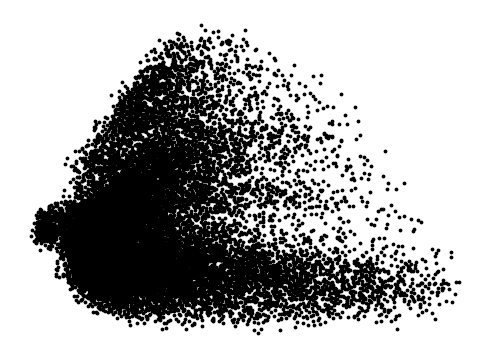

In [4]:
from transformers import BertTokenizer, BertModel

# MODEL_PATH = 'fagner/envoy'
MODEL_PATH = 'bert-base-cased'
# MODEL_PATH = 'openai-community/gpt'
# MODEL_PATH = 'HeroGeonil/Hypert-medical'

# MODEL_PATH = 'dmis-lab/biobert-base-cased-v1.1'

tokenizer = BertTokenizer.from_pretrained(MODEL_PATH, do_lower_case=False)
model = BertModel.from_pretrained(MODEL_PATH)

embeds = model.state_dict()['embeddings.word_embeddings.weight'] 

words = list(tokenizer.vocab.keys())

X_reduzido = embeds[:20000]
words_reduzido = words[:20000]
# X_reduzido = embeds
# words_reduzido = words

# print('Tamanho: ',len(words_reduzido))

# for param_tensor in model.state_dict():
#     print(param_tensor, "\t", model.state_dict()[param_tensor].size())  

from sklearn import manifold

X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X_reduzido)

from matplotlib import pyplot as plt
import os
import numpy as np

IMG_PATH = 'imgs/'

if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

IMG_NAME = MODEL_PATH.replace('/', "-").replace('.', "-")
# print(IMG_NAME)

# def plot_clustering(X_red, labels, title=None):
# plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']

def plot_clustering(X_red, title=None):
    # X_grandao = X_red
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)
    # X_grandao.append(X_red)

    plt.figure(figsize=(5, 4))

    # for i in range(3)
    # X_reduzido = embeds[:10000]
    # words_reduzido = words[:10000]

    # X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X_reduzido)
    
    # print(X_red)
    # plt.scatter(X_red[:, 0], X_red[:, 1], color='black', s=3)
    # np.concatenate(X_grandao , X_red)
    # print(X_red)
    # X_reduzido = embeds[10001:20000]
    # words_reduzido = words[10001:20000]

    # X_red1 = manifold.SpectralEmbedding(n_components=2).fit_transform(X_reduzido)
    # x_min, x_max = np.min(X_red1, axis=0), np.max(X_red1, axis=0)
    # X_red1 = (X_red1 - x_min) / (x_max - x_min)
    # # X_red.append(X_red1)
    # X_red = np.append(X_red , X_red1, axis=0)
    # print(X_red)
    # # numpy.append(M, a)
    # # plt.scatter(X_red[:, 0], X_red[:, 1], color='black', s=3)

    # X_reduzido = embeds[20001:len(embeds)]
    # words_reduzido = words[20001:len(embeds)]

    # X_red2 = manifold.SpectralEmbedding(n_components=2).fit_transform(X_reduzido)
    # x_min, x_max = np.min(X_red2, axis=0), np.max(X_red2, axis=0)
    # X_red2 = (X_red2 - x_min) / (x_max - x_min)
    # X_red = np.append(X_red , X_red2, axis=0)

    
    # print(X_red)

    plt.scatter(X_red[:, 0], X_red[:, 1], color='black', s=3)
    
    # plt.scatter(X_red[:, 0], X_red[:, 1], color='black', s=3)

    
#     for i in range(X_red.shape[0]):
# #         print(X_red[i, 0])
# #         print(X_red[i, 1])
#         plt.text(X_red[i, 0], X_red[i, 1], str(words_reduzido[i]),
#                  # color=plt.cm.nipy_spectral(labels[i] / 10.),
#                  color=plt.cm.nipy_spectral(0 / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
#     if title is not None:
#         plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(IMG_PATH + title + '.eps')

plot_clustering(X_red, IMG_NAME)


In [ ]:
    plt.savefig(IMG_PATH + title)
